In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from cmip_analysis import drop_duplicates
from tqdm import tqdm

In [2]:
def time_series(v, models, path):
    out = []
    for m in tqdm(models):
        try:
                out.append(drop_duplicates(
                    xr.open_mfdataset(path+m+"/*.nc", combine="by_coords")
                    [v]).resample({"time":"1M"}).mean("time").mean(("lat","lon")).
                           sel({"time":slice("1960","2100")})
                          .persist())
        except:
                out.append(drop_duplicates(
                    xr.open_mfdataset(path+m+"/*.nc", combine="nested", concat_dim="time")
                    [v]).resample({"time":"1M"}).mean("time").mean(("lat","lon")).
                           sel({"time":slice("1960","2100")})
                          .persist())
    return out

def plot(ts, models):
    cnt = 1
    plt.figure(figsize=[9,14])
    for t in ts:
        plt.subplot(len(models)/2, 2, cnt)
        t.plot()
        plt.title(models[cnt-1])
        cnt=cnt+1
    plt.subplots_adjust(hspace=0.8)            
            
models = ["ACCESS1-0","ACCESS1-3","ACCESS-CM2","ACCESS-ESM1-5","bcc-csm1-1","BNU-ESM",
         "CNRM-CM5","GFDL-CM3","GFDL-ESM2G","GFDL-ESM2M","IPSL-CM5A-LR","IPSL-CM5A-MR",
         "MIROC5","MRI-CGCM3"]
path = "/g/data/eg3/ab4502/ExtremeWind/aus/"


100%|██████████| 14/14 [03:22<00:00, 14.48s/it]


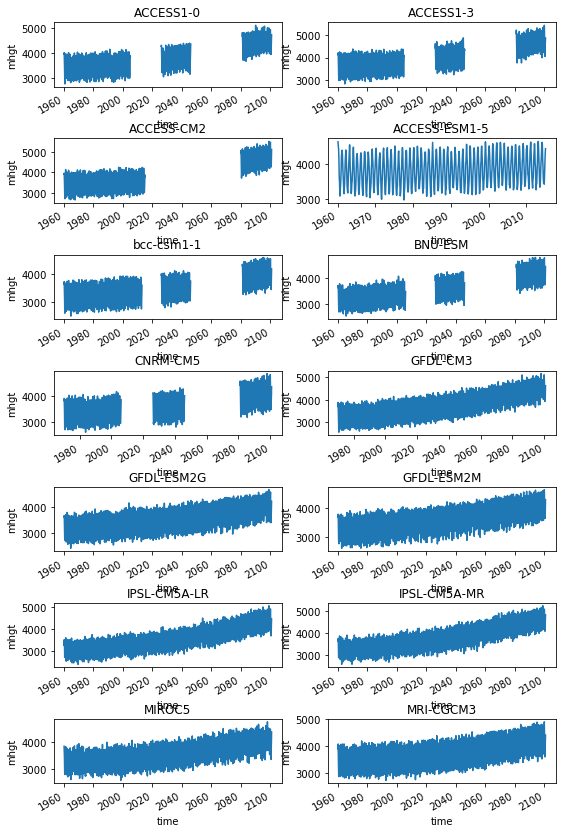

In [3]:
ts = time_series("mhgt", models, path)
plot(ts, models)

100%|██████████| 14/14 [02:50<00:00, 12.18s/it]


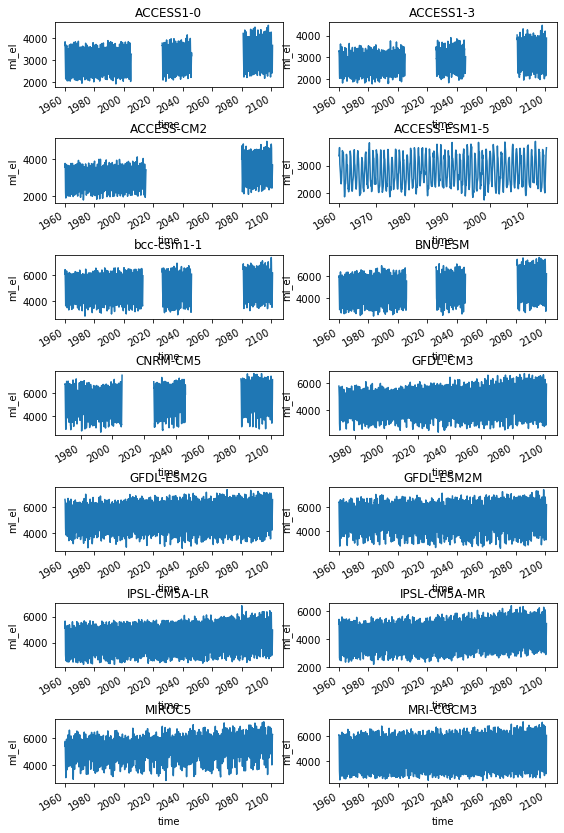

In [4]:
ts = time_series("ml_el", models, path)
plot(ts, models)